In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
plt.rcParams["figure.figsize"] = (6.0, 6.0)
plt.rcParams["image.cmap"] = "gray"

# Read and Display the original Handwritten Signature

we are going to load the image in normal mode, which comes in BGR format by default. This is important to note because we will need to convert it to RGB later for display.

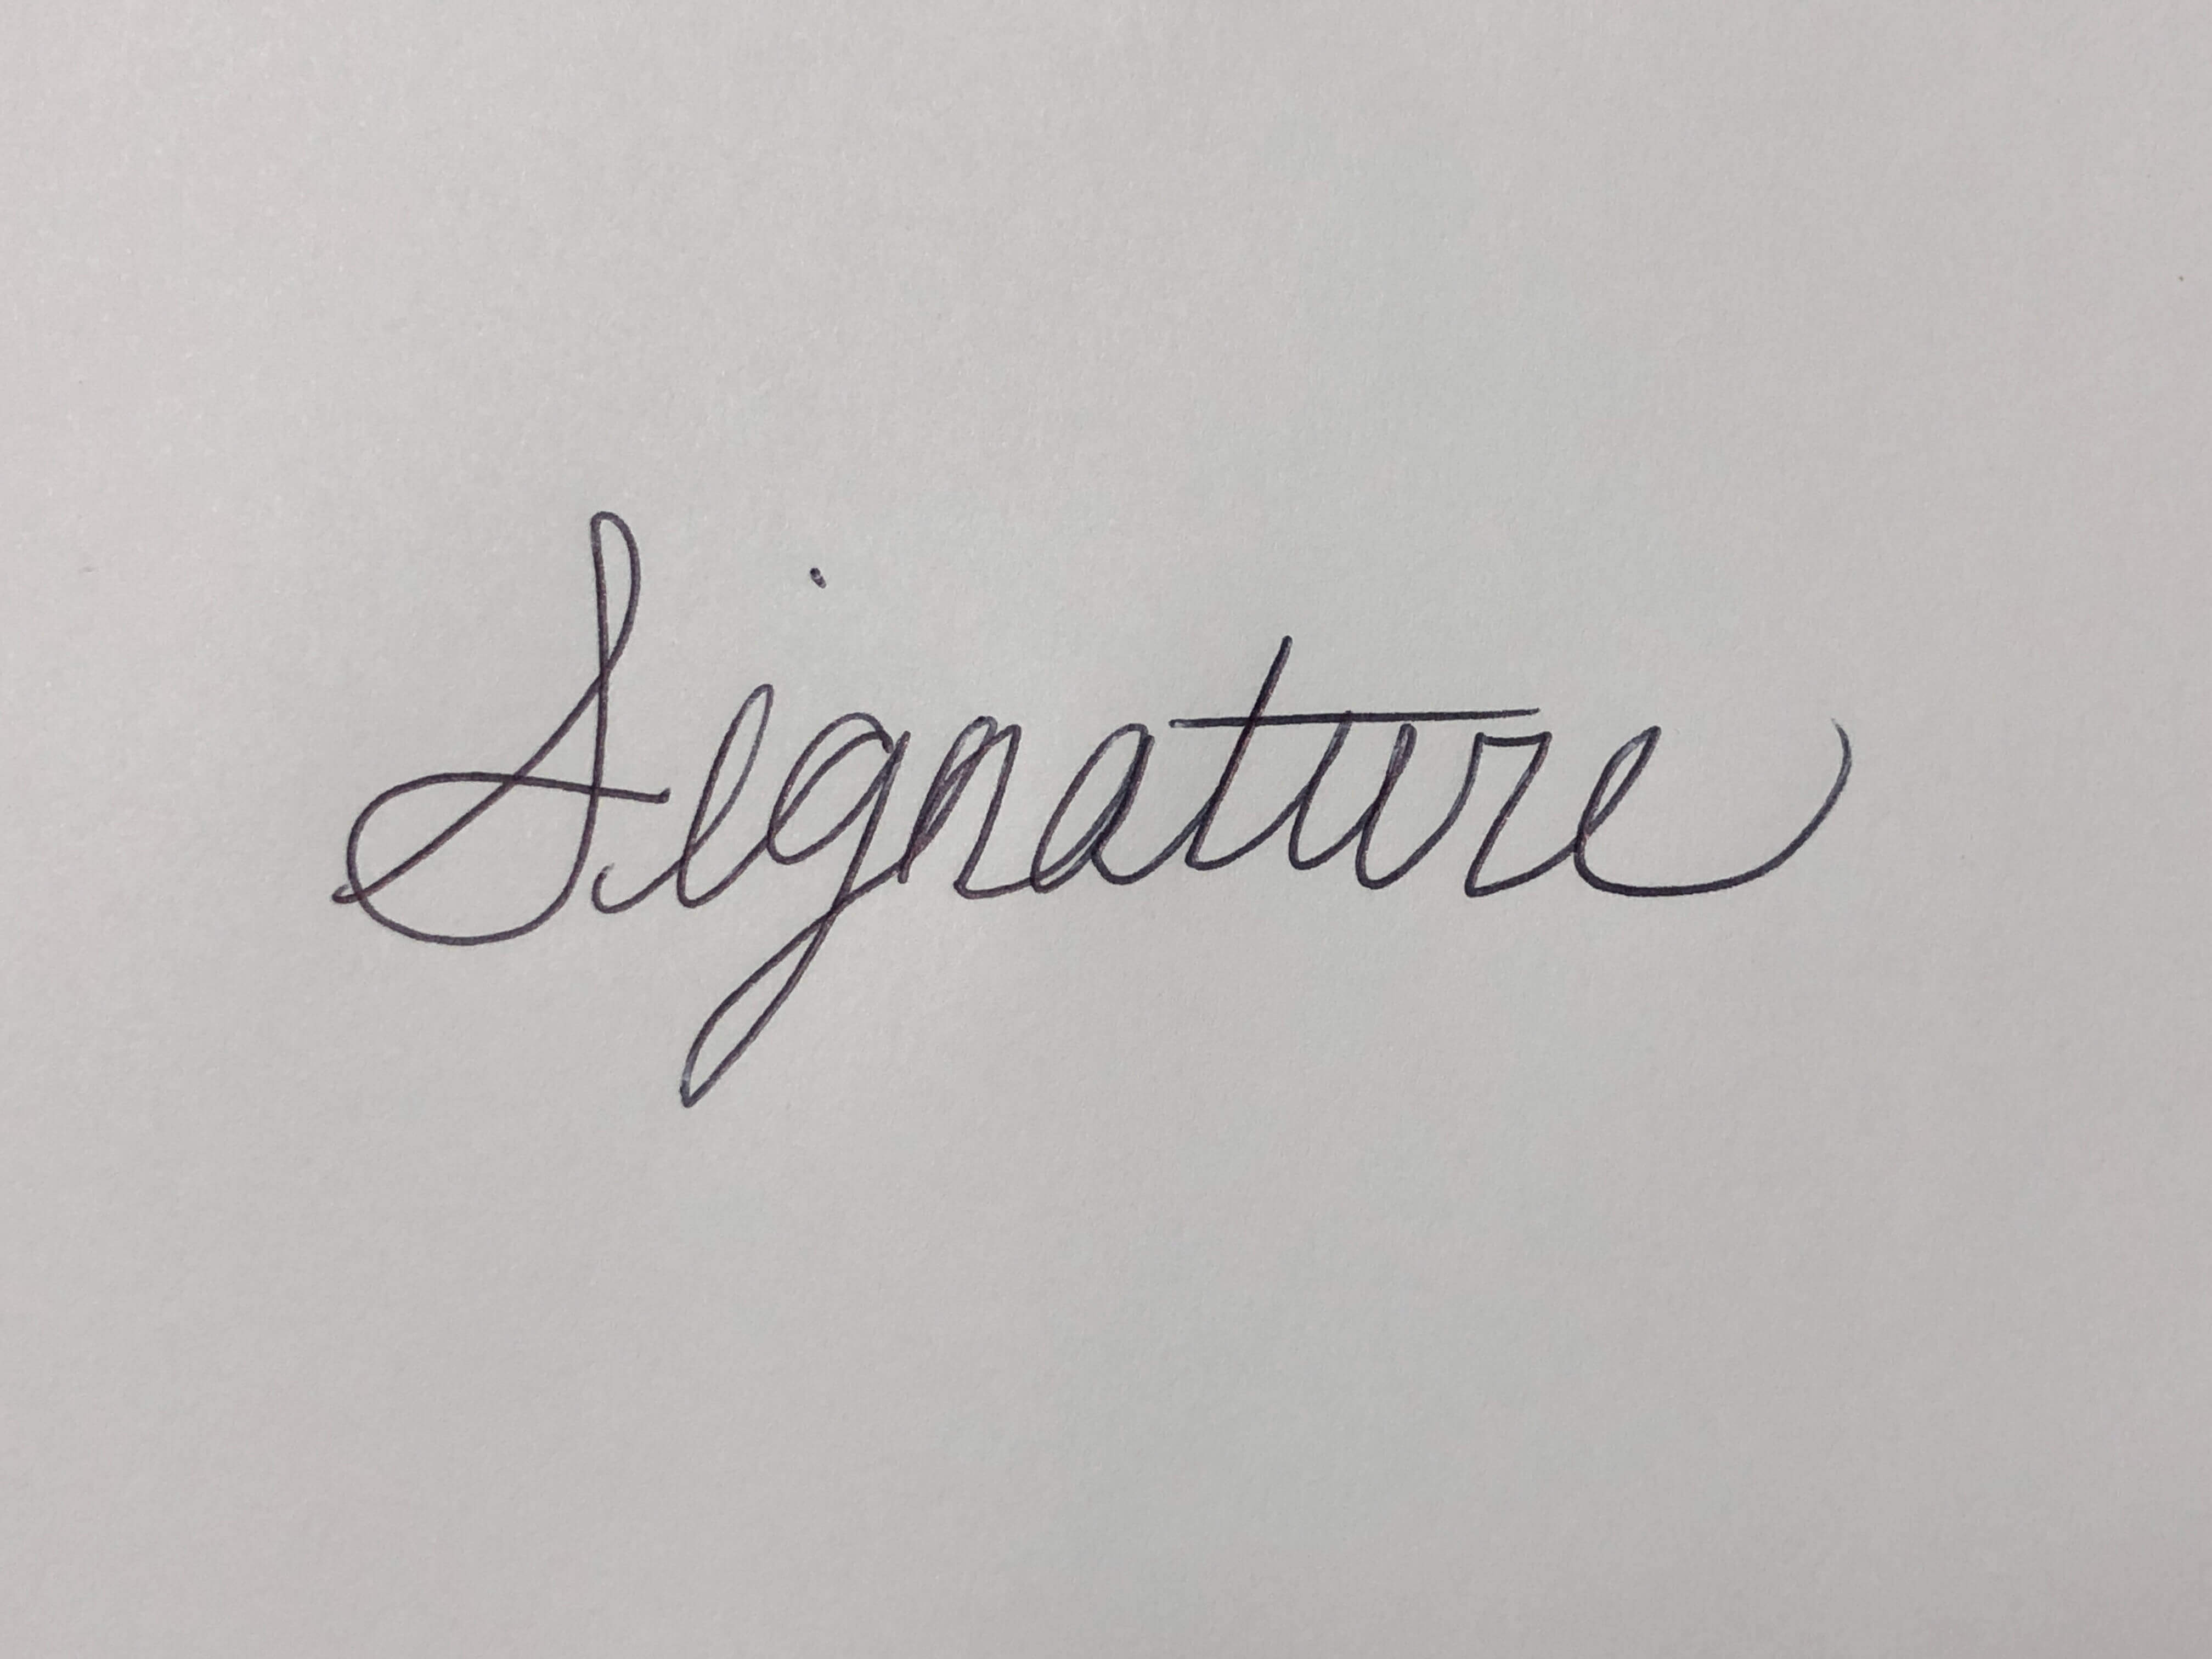

In [9]:
# Read the image
sig_org = cv2.imread("./signature.jpg", cv2.IMREAD_COLOR)

# Display the actual image
Image("./signature.jpg", width=400)

# Crop the Signature

This is going to be useful because it helps eliminate if there is any uneven lighting in areas of the image we don't care about it. Also makes it easier to use the signature that we create in a pdf editor because we're focused on the signature itself and not all the white space.

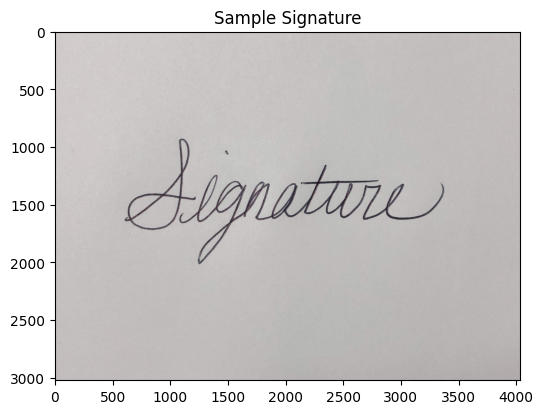

In [13]:
# Display the image using imshow() so we can see the size with axis
plt.imshow(sig_org[:, :, ::-1])
plt.title("Sample Signature");

### Crop the signature

This step is not tecnically required in this case. However, if the original image contained artifacts such as shadows or other markings on the paper, then cropping them out can be helpful prior to creating the alpha mask. Removing excess whitespace around the signature also makes it more convenient to work with a transform once brought into a PDF editor.

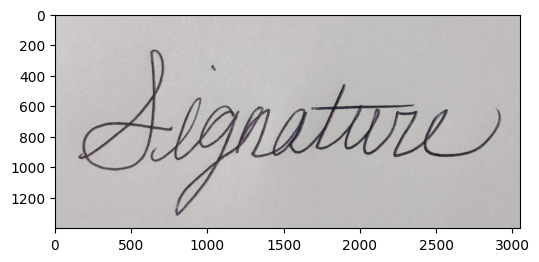

In [17]:
# Crop the signature from the original image
sig = sig_org[700:2100, 450:3500, :]
plt.imshow(sig[:, :, ::-1]);